<h1>HW6 by Hyomin Jeong</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
import Random

In [3]:
using SpecialFunctions, Plots, Random
function sample_gaussian(μ, σ, n)
    p = []
    for i in 1:n
        pp = rand()
        gaussian_icdf = @. μ + (σ * sqrt(2) * erfinv(2 * pp - 1))
        push!(p, gaussian_icdf)
    end
return p
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
#1
sample_gaussian(-1, 2, 10000)

10000-element Vector{Any}:
  1.4876749503095645
 -0.1344111402905006
  1.150840264426947
 -2.35492403367178
 -1.6336258818160085
  0.9723062470983146
 -3.6111721923605726
 -4.489069851907701
 -0.9449288026801014
  1.3530447301199344
 -0.7051733802149547
 -3.1819799561873183
  0.12868901936717703
  ⋮
 -1.3408682870115887
 -0.43917452978062044
 -1.2676099318791056
 -3.1448469832726857
  4.571859476603222
 -2.5783268232789442
 -4.252133794074118
 -1.7445434326460447
 -1.0196978302094801
 -2.0028643532767347
  2.014987689295042
  0.7945094411548039

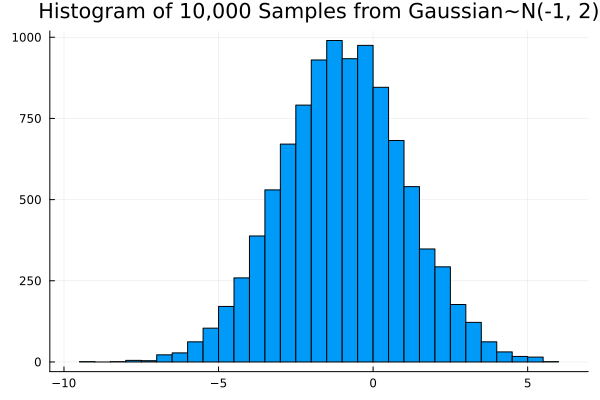

In [5]:
#2
y = sample_gaussian(-1, 2, 10000)
histogram(y, label=false, bins = 50, title="Histogram of 10,000 Samples from Gaussian~N(-1, 2)")

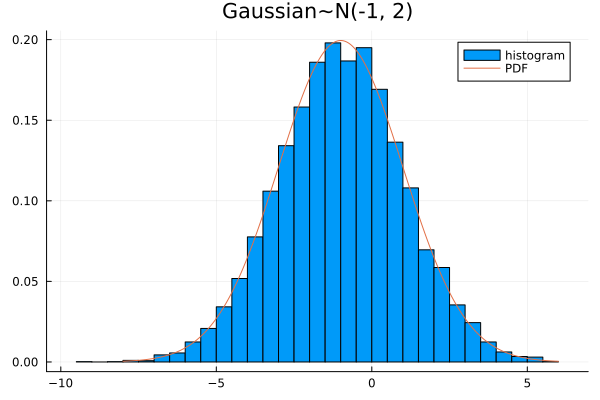

In [6]:
#3
using Distributions

μ = -1
σ = 2
x = -8:0.001:6
y2 = pdf.(Normal(μ, σ), x)

#4
histogram(y, label="histogram", bins = 50, title="Gaussian~N(-1, 2)", normalize=true)
plot!(x, y2, label="PDF")